In [32]:
import tensorflow as tf
print('TensorFlow :', tf.__version__)

TensorFlow : 2.9.1


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras_preprocessing import image
from shutil import copyfile
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import zipfile
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import scipy
import pathlib

In [34]:
DATASET_PATH = './datasets/'

os.listdir(DATASET_PATH)

['Nodules',
 'Whitehead',
 'Blackhead',
 '.ipynb_checkpoints',
 'Normal',
 'Pustules',
 'acne',
 'Papule']

In [35]:
print('Papula:', len(os.listdir('./datasets/Papule')))
print('Whitehead:', len(os.listdir('./datasets/Whitehead')))
print('Pustula:', len(os.listdir('./datasets/Pustules')))
print('Blackhead:', len(os.listdir('./datasets/Blackhead')))
print('Nodule:', len(os.listdir('./datasets/Nodules')))
print('Normal:', len(os.listdir('./datasets/Normal')))

Papula: 50
Whitehead: 56
Pustula: 54
Blackhead: 51
Nodule: 59
Normal: 53


In [36]:
def split_data(SOURCE, TRAINING, TESTING, VALIDATION, SPLIT_SIZE):
    if not os.path.exists(TRAINING): 
        os.makedirs(TRAINING) 
                
    if not os.path.exists(TESTING): 
        os.makedirs(TESTING) 
        
    if not os.path.exists(VALIDATION): 
        os.makedirs(VALIDATION)

    file_names = os.listdir(SOURCE) 
    file_number = len(file_names) 

    for index, file in enumerate(file_names): 
        if index < SPLIT_SIZE * file_number: 
            if index < 0.8 * file_number:
                copyfile(os.path.join(SOURCE, file), os.path.join(TRAINING, file))
            else:
                copyfile(os.path.join(SOURCE, file), os.path.join(VALIDATION, file))
        else: 
            copyfile(os.path.join(SOURCE, file), os.path.join(TESTING, file))
        
PAPULA_SOURCE_DIR = './datasets/Papule'
WHITEHEAD_SOURCE_DIR = './datasets/Whitehead'
PUSTULA_SOURCE_DIR = './datasets/Pustules'
BLACKHEAD_SOURCE_DIR = './datasets/Blackhead'
NODUL_SOURCE_DIR = "./datasets/Nodules"
NORMAL_SOURCE_DIR = "./datasets/Normal"

TRAINING_PAPULA_DIR = "./datasets/acne/training/papula"
TRAINING_WHITEHEAD_DIR = "./datasets/acne/training/whitehead"
TRAINING_PUSTULA_DIR = "./datasets/acne/training/pustula"
TRAINING_BLACKHEAD_DIR = "./datasets/acne/training/blackhead"
TRAINING_NODUL_DIR = "./datasets/acne/training/nodul"
TRAINING_NORMAL_DIR = "./datasets/acne/training/normal"

TESTING_PAPULA_DIR = "./datasets/acne/testing/papula"
TESTING_WHITEHEAD_DIR = "./datasets/acne/testing/whitehead"
TESTING_PUSTULA_DIR = "./datasets/acne/testing/pustula"
TESTING_BLACKHEAD_DIR = "./datasets/acne/testing/blackhead"
TESTING_NODUL_DIR = "./datasets/acne/testing/nodul"
TESTING_NORMAL_DIR = "./datasets/acne/testing/normal"

VALIDATION_PAPULA_DIR = "./datasets/acne/validation/papula"
VALIDATION_WHITEHEAD_DIR = "./datasets/acne/validation/whitehead"
VALIDATION_PUSTULA_DIR = "./datasets/acne/validation/pustula"
VALIDATION_BLACKHEAD_DIR = "./datasets/acne/validation/blackhead"
VALIDATION_NODUL_DIR = "./datasets/acne/validation/nodul"
VALIDATION_NORMAL_DIR = "./datasets/acne/validation/normal"

split_size = .8
split_data(PAPULA_SOURCE_DIR, TRAINING_PAPULA_DIR, TESTING_PAPULA_DIR, VALIDATION_PAPULA_DIR, split_size)
split_data(WHITEHEAD_SOURCE_DIR, TRAINING_WHITEHEAD_DIR, TESTING_WHITEHEAD_DIR, VALIDATION_WHITEHEAD_DIR, split_size)
split_data(PUSTULA_SOURCE_DIR, TRAINING_PUSTULA_DIR, TESTING_PUSTULA_DIR, VALIDATION_PUSTULA_DIR, split_size)
split_data(BLACKHEAD_SOURCE_DIR, TRAINING_BLACKHEAD_DIR, TESTING_BLACKHEAD_DIR, VALIDATION_BLACKHEAD_DIR, split_size)
split_data(NODUL_SOURCE_DIR, TRAINING_NODUL_DIR, TESTING_NODUL_DIR, VALIDATION_NODUL_DIR, split_size)
split_data(NORMAL_SOURCE_DIR, TRAINING_NORMAL_DIR, TESTING_NORMAL_DIR, VALIDATION_NORMAL_DIR, split_size)

In [37]:
train_papula = os.listdir(TRAINING_PAPULA_DIR)
train_whitehead = os.listdir(TRAINING_WHITEHEAD_DIR)
train_pustula = os.listdir(TRAINING_PUSTULA_DIR)
train_blackhead = os.listdir(TRAINING_BLACKHEAD_DIR)
train_nodul = os.listdir(TRAINING_NODUL_DIR)
train_normal = os.listdir(TRAINING_NORMAL_DIR)

test_papula = os.listdir(TESTING_PAPULA_DIR)
test_whitehead = os.listdir(TESTING_WHITEHEAD_DIR)
test_pustula = os.listdir(TESTING_PUSTULA_DIR)
test_blackhead = os.listdir(TESTING_BLACKHEAD_DIR)
test_nodul = os.listdir(TESTING_NODUL_DIR)
test_normal = os.listdir(TESTING_NORMAL_DIR)

val_papula = os.listdir(VALIDATION_PAPULA_DIR)
val_whitehead = os.listdir(VALIDATION_WHITEHEAD_DIR)
val_pustula = os.listdir(VALIDATION_PUSTULA_DIR)
val_blackhead = os.listdir(VALIDATION_BLACKHEAD_DIR)
val_nodul = os.listdir(VALIDATION_NODUL_DIR)
val_normal = os.listdir(VALIDATION_NORMAL_DIR)

print("Training")
print('Papula :', len(train_papula))
print('Whitehead :', len(train_whitehead))
print('Pustula :', len(train_pustula))
print('Blackhead :', len(train_blackhead))
print('Nodul :', len(train_nodul))
print('Normal :', len(train_normal))

print("\nTesting")
print('Papula :', len(test_papula))
print('Whitehead :', len(test_whitehead))
print('Pustula :', len(test_pustula))
print('Blackhead :', len(test_blackhead))
print('Nodul :', len(test_nodul))
print('Normal :', len(test_normal))

print("\nValidation")
print('Papula :', len(val_papula))
print('Whitehead :', len(val_whitehead))
print('Pustula :', len(val_pustula))
print('Blackhead :', len(val_blackhead))
print('Nodul :', len(val_nodul))
print('Normal :', len(val_normal))

Training
Papula : 40
Whitehead : 45
Pustula : 44
Blackhead : 41
Nodul : 48
Normal : 43

Testing
Papula : 10
Whitehead : 11
Pustula : 10
Blackhead : 10
Nodul : 11
Normal : 10

Validation
Papula : 5
Whitehead : 6
Pustula : 5
Blackhead : 5
Nodul : 6
Normal : 5


In [38]:
BATCH_SIZE = 64
IMG_SIZE = (224, 224)

TRAINING_DIR = './datasets/acne/training'
train_datagen = image.ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=45,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE, 
    shuffle=True
)


TESTING_DIR = './datasets/acne/testing'
datagen = image.ImageDataGenerator(rescale = 1.0/255.0)
test_generator = datagen.flow_from_directory(
    TESTING_DIR, 
    class_mode='categorical', 
    batch_size=6*BATCH_SIZE, 
    target_size=IMG_SIZE,
    shuffle=False
)


VALIDATION_DIR = './datasets/acne/validation'
datagen = image.ImageDataGenerator(rescale = 1.0/255.0)
val_generator = datagen.flow_from_directory(
    VALIDATION_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE,
    shuffle=False
)

Found 261 images belonging to 6 classes.
Found 62 images belonging to 6 classes.
Found 32 images belonging to 6 classes.


In [39]:
train_dataset = image_dataset_from_directory(TRAINING_DIR,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 261 files belonging to 6 classes.


In [40]:
class_names = train_dataset.class_names

print(class_names)

['blackhead', 'nodul', 'normal', 'papula', 'pustula', 'whitehead']


In [41]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

pretrained_model = MobileNetV2(input_shape = (224, 224, 3),
                                include_top = False,
                                weights = 'imagenet')

In [42]:
for layer in pretrained_model.layers:
    layer.trainable = False

In [43]:
x = pretrained_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x) 
x = tf.keras.layers.Dense(1024,activation='relu')(x) 
x = tf.keras.layers.Dense(512,activation='relu')(x)  
x = tf.keras.layers.Dense(6,activation='softmax')(x) 

model = Model(pretrained_model.input, x)     

In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [45]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.97):
            self.model.stop_training = True

callbacks = myCallback()

In [46]:
hist = model.fit(train_generator, epochs=30, validation_data = val_generator, verbose = 1, callbacks=[callbacks])

Epoch 1/30
5/5 [==============================] - 21s 3s/step - loss: 1.5474 - accuracy: 0.5134 - val_loss: 1.0848 - val_accuracy: 0.7188
Epoch 2/30
5/5 [==============================] - 12s 2s/step - loss: 0.9343 - accuracy: 0.7931 - val_loss: 0.7544 - val_accuracy: 0.8750
Epoch 3/30
5/5 [==============================] - 12s 2s/step - loss: 0.6915 - accuracy: 0.8161 - val_loss: 0.5421 - val_accuracy: 0.9375
Epoch 4/30
5/5 [==============================] - 12s 2s/step - loss: 0.5014 - accuracy: 0.8736 - val_loss: 0.4565 - val_accuracy: 0.9062
Epoch 5/30
5/5 [==============================] - 12s 3s/step - loss: 0.3948 - accuracy: 0.8812 - val_loss: 0.3359 - val_accuracy: 0.8750
Epoch 6/30
5/5 [==============================] - 12s 2s/step - loss: 0.3417 - accuracy: 0.8774 - val_loss: 0.2784 - val_accuracy: 0.9375
Epoch 7/30
5/5 [==============================] - 11s 3s/step - loss: 0.2755 - accuracy: 0.9157 - val_loss: 0.2569 - val_accuracy: 0.8750
Epoch 8/30
5/5 [==================

In [47]:
X, y = test_generator.next()
classes_ind = test_generator.class_indices
labels = list(classes_ind.keys())
print('Loss of the model is - ', model.evaluate(X, y)[0])
print('Accuracy of the model is - ', model.evaluate(X, y)[1]*100, '%')

predict = model.predict(X)
predict = np.argmax(predict, axis=1)
predict = predict.reshape(1, -1)[0]
y_label = np.argmax(y, axis=1)
report = classification_report(y_label, predict, target_names =labels)
print(report)

2/2 [==============================] - 2s 865ms/step - loss: 0.1792 - accuracy: 0.9194
Loss of the model is -  0.17915590107440948
2/2 [==============================] - 2s 857ms/step - loss: 0.1792 - accuracy: 0.9194
Accuracy of the model is -  91.93548560142517 %
2/2 [==============================] - 3s 845ms/step
              precision    recall  f1-score   support

   blackhead       0.91      1.00      0.95        10
       nodul       1.00      0.82      0.90        11
      normal       1.00      1.00      1.00        10
      papula       1.00      0.70      0.82        10
     pustula       0.83      1.00      0.91        10
   whitehead       0.85      1.00      0.92        11

    accuracy                           0.92        62
   macro avg       0.93      0.92      0.92        62
weighted avg       0.93      0.92      0.92        62



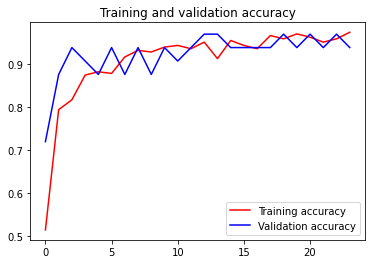

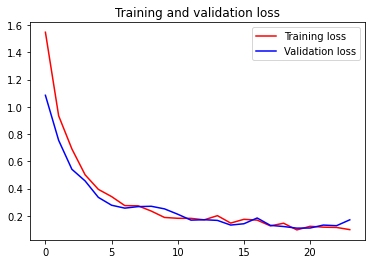

In [55]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [56]:
saved_model_path = "./Model/model_new.h5"

model.save(saved_model_path)

In [57]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpgtz47fl6/assets


INFO:tensorflow:Assets written to: /tmp/tmpgtz47fl6/assets
2022-06-11 12:57:39.205956: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-06-11 12:57:39.206012: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-06-11 12:57:39.207508: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpgtz47fl6
2022-06-11 12:57:39.243092: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-06-11 12:57:39.243146: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmpgtz47fl6
2022-06-11 12:57:39.376782: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-06-11 12:57:40.044449: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/tmpgtz47fl6
2022-06-11 12:57:40.311669: I tensorflow/cc/saved_model/loader.cc:301] SavedModel

In [58]:
tflite_model_file = pathlib.Path('./Model/model_new.tflite')
tflite_model_file.write_bytes(tflite_model)

20417816